# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\maxba\\anaconda3\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached matplotlib-3.6.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached tensorflow_gpu-2.9.2-cp39-cp39-win_amd64.whl (444.1 MB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
annoy                         1.17.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
back


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



rsa                           4.7.2
Rtree                         0.9.7
ruamel-yaml-conda             0.15.100
s3transfer                    0.5.0
scikit-image                  0.19.2
scikit-learn                  1.0.2
scikit-learn-intelex          2021.20220215.102710
scipy                         1.7.3
Scrapy                        2.6.1
seaborn                       0.11.2
Send2Trash                    1.8.0
service-identity              18.1.0
setuptools                    61.2.0
sgmllib3k                     1.0.0
simplejson                    3.17.6
sip                           4.19.13
six                           1.16.0
smart-open                    5.2.1
sniffio                       1.2.0
snowballstemmer               2.2.0
sortedcollections             2.1.0
sortedcontainers              2.4.0
soupsieve                     2.3.1
spacy                         3.3.1
spacy-legacy                  3.0.9
spacy-loggers                 1.0.2
Sphinx                        4.4.0
s

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 179 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

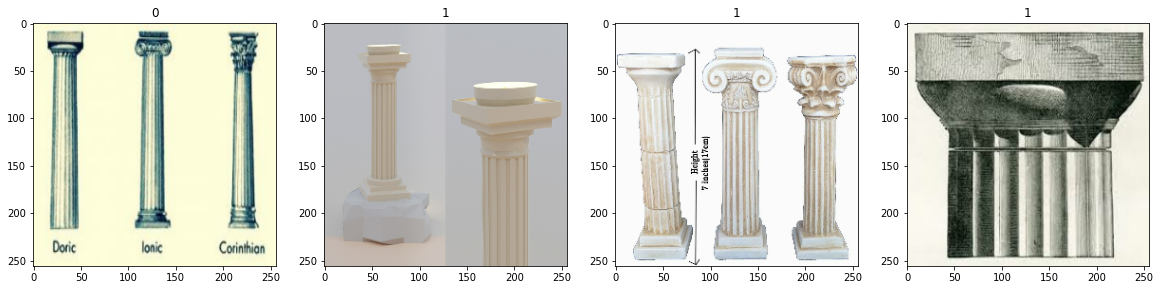

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.14117648, 0.2509804 , 0.43529412],
          [0.14117648, 0.2509804 , 0.43529412],
          [0.14496592, 0.25476983, 0.43908358],
          ...,
          [0.132981  , 0.25454962, 0.4349418 ],
          [0.12794118, 0.2495098 , 0.42990196],
          [0.12838733, 0.24995595, 0.43034813]],
 
         [[0.14460784, 0.25441176, 0.4387255 ],
          [0.14068627, 0.2504902 , 0.43480393],
          [0.14117648, 0.2509804 , 0.43529412],
          ...,
          [0.12936772, 0.25093636, 0.4313285 ],
          [0.14030522, 0.26187384, 0.44226602],
          [0.12669079, 0.24825943, 0.42865157]],
 
         [[0.14754902, 0.25882354, 0.44264707],
          [0.14411765, 0.25539216, 0.4392157 ],
          [0.14068627, 0.25196078, 0.4357843 ],
          ...,
          [0.13011642, 0.25155294, 0.43198913],
          [0.13039216, 0.2504902 , 0.43137255],
          [0.13279909, 0.25289714, 0.43377948]],
 
         ...,
 
         [[0.18010685, 0.3095186 , 0.5095186 ],
          [0.17621

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [16]:
train_size + val_size + test_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 10s 2s/step - loss: 1.7675 - accuracy: 0.5156 - val_loss: 0.7865 - val_accuracy: 0.5490
Epoch 2/20
4/4 [==============================] - 4s 845ms/step - loss: 0.8036 - accuracy: 0.4922 - val_loss: 0.7727 - val_accuracy: 0.4118
Epoch 3/20
4/4 [==============================] - 3s 775ms/step - loss: 0.7116 - accuracy: 0.5078 - val_loss: 0.6897 - val_accuracy: 0.5098
Epoch 4/20
4/4 [==============================] - 3s 775ms/step - loss: 0.6939 - accuracy: 0.5078 - val_loss: 0.6670 - val_accuracy: 0.6275
Epoch 5/20
4/4 [==============================] - 3s 768ms/step - loss: 0.6872 - accuracy: 0.5469 - val_loss: 0.6251 - val_accuracy: 0.7451
Epoch 6/20
4/4 [==============================] - 4s 810ms/step - loss: 0.6417 - accuracy: 0.6016 - val_loss: 0.6049 - val_accuracy: 0.7451
Epoch 7/20
4/4 [==============================] - 4s 817ms/step - loss: 0.6094 - accuracy: 0.7422 - val_loss: 0.5273 - val_accuracy: 0.7843
Epoch 8/20
4/4 [======

# 8. Plot Performance

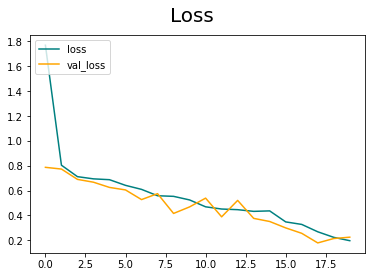

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

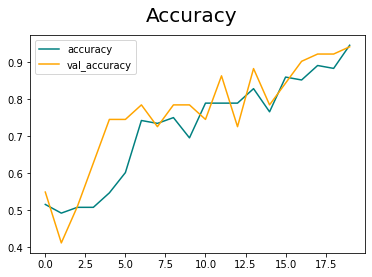

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [42]:
import cv2

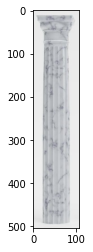

In [43]:
img = cv2.imread('dorique.jpg')
plt.imshow(img)
plt.show()

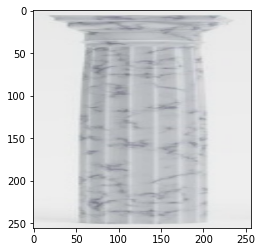

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [46]:
yhat

array([[0.63247395]], dtype=float32)

In [49]:
if yhat > 0.5: 
    print(f'Predicted class is dorique')
else:
    print(f'Predicted class is corinthien')

Predicted class is dorique


# 11. Save the Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))